In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
import statistics  as stats 
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
pd.options.display.max_columns = None
pd.options.display.max_rows = None   
pd.options.display.float_format = '{:.6f}'.format
from sklearn.model_selection import train_test_split
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from sklearn.metrics import mean_squared_error

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
import pydotplus
from IPython.display import Image  
from sklearn.feature_selection import RFE
from statsmodels.compat import lzip
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse
from scipy import stats
from scipy.stats import shapiro
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB

In [3]:
df=pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx',names=['Relative Compactness','Surface Area','Wall Area','Roof Area','Overall Height','Orientation','Glazing Area','Glazing Area Distribution','Heating Load','Cooling Load'])

In [4]:
df.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [5]:
df.shape

(768, 10)

In [6]:
df.info

<bound method DataFrame.info of      Relative Compactness  Surface Area  Wall Area  Roof Area  Overall Height  \
0                    0.98         514.5      294.0     110.25             7.0   
1                    0.98         514.5      294.0     110.25             7.0   
2                    0.98         514.5      294.0     110.25             7.0   
3                    0.98         514.5      294.0     110.25             7.0   
4                    0.90         563.5      318.5     122.50             7.0   
..                    ...           ...        ...        ...             ...   
763                  0.64         784.0      343.0     220.50             3.5   
764                  0.62         808.5      367.5     220.50             3.5   
765                  0.62         808.5      367.5     220.50             3.5   
766                  0.62         808.5      367.5     220.50             3.5   
767                  0.62         808.5      367.5     220.50             3.5

In [7]:
df.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [8]:
df.isnull().sum()

Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
Cooling Load                 0
dtype: int64

# UNIVARIATE ANALYSIS

In [9]:
df['Relative Compactness'].nunique()

12

In [11]:
df['Relative Compactness'].value_counts()

0.98    64
0.90    64
0.86    64
0.82    64
0.79    64
0.76    64
0.74    64
0.71    64
0.69    64
0.66    64
0.64    64
0.62    64
Name: Relative Compactness, dtype: int64

In [26]:
#Inference-The Relative Compactness is equally distributed in the dataset.

In [14]:
df['Surface Area'].nunique()

12

In [15]:
df['Surface Area'].value_counts()

514.5    64
563.5    64
588.0    64
612.5    64
637.0    64
661.5    64
686.0    64
710.5    64
735.0    64
759.5    64
784.0    64
808.5    64
Name: Surface Area, dtype: int64

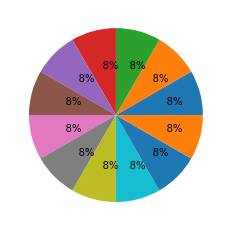

In [18]:
import matplotlib.pyplot as plt
plt.pie(df['Surface Area'].value_counts(),autopct= '%6.f%%')
plt.show()

In [ ]:
#Inference-The surface area is equally distributed in the dataset.

In [19]:
df['Wall Area'].nunique()

7

In [21]:
df['Wall Area'].value_counts()

294.0    192
318.5    192
343.0    128
416.5     64
245.0     64
269.5     64
367.5     64
Name: Wall Area, dtype: int64

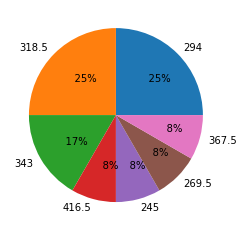

In [25]:
plt.pie(df['Wall Area'].value_counts(),labels=['294','318.5','343','416.5','245','269.5','367.5'],autopct= '%6.f%%')
plt.show()

In [ ]:
#Inference-67% of the data belongs to three categories of area 294,318.5 and 343.

In [29]:
df['Roof Area'].value_counts()

220.50    384
147.00    192
122.50    128
110.25     64
Name: Roof Area, dtype: int64

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


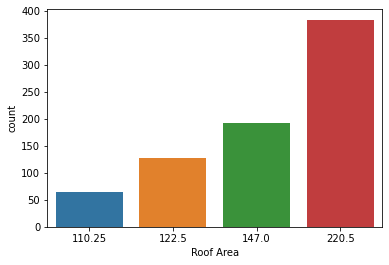

In [28]:
sns.countplot(df['Roof Area'] )
plt.show()

In [ ]:
#Inference-Roof area of 220.5 has the highest frequency in the dataset.

In [30]:
df['Overall Height'].value_counts()

7.0    384
3.5    384
Name: Overall Height, dtype: int64

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


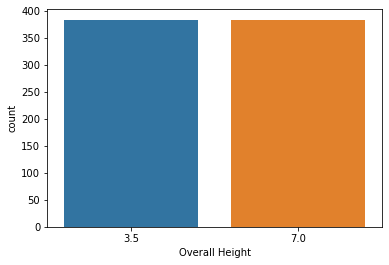

In [31]:
sns.countplot(df['Overall Height'] )
plt.show()

In [ ]:
#Inference-The height is equally distributed

In [32]:
df['Orientation'].value_counts()

2    192
3    192
4    192
5    192
Name: Orientation, dtype: int64

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


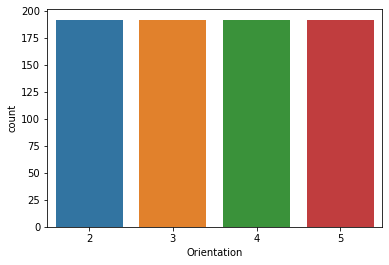

In [33]:
sns.countplot(df['Orientation'] )
plt.show()

In [ ]:
#Inference- Orientation is equally distributed amongst data.

In [34]:
df['Glazing Area'].value_counts()

0.10    240
0.25    240
0.40    240
0.00     48
Name: Glazing Area, dtype: int64

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


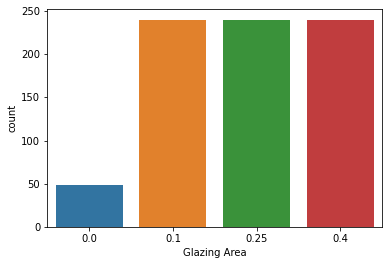

In [35]:
sns.countplot(df['Glazing Area'] )
plt.show()

In [ ]:
#Inference-Glazing area of 0.0 has the least frequency amongst others.

In [36]:
df['Glazing Area Distribution'].value_counts()

1    144
2    144
3    144
4    144
5    144
0     48
Name: Glazing Area Distribution, dtype: int64

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


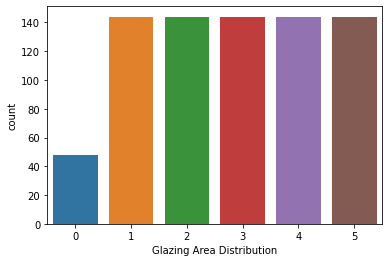

In [38]:
sns.countplot(df['Glazing Area Distribution'] )
plt.show()

In [ ]:
#Inference-Glazing Area Distribution of category 0 has the lowest frequency.

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


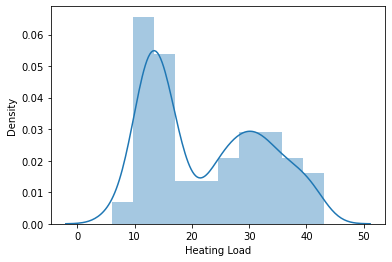

In [40]:
sns.distplot(df['Heating Load'])
plt.show()

In [ ]:
#Inference- Heating Load ranges from 5 to 45 approximately.

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


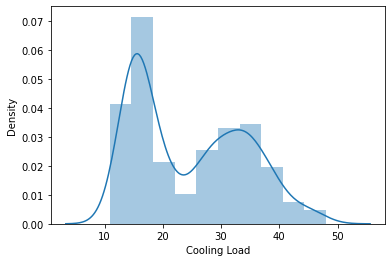

In [42]:
sns.distplot(df['Cooling Load'])
plt.show()

In [43]:
#Inference- Cooling Load ranges from 11 to 48 approximately.

# Cooling Load(Train_test_split)

In [45]:
from sklearn.model_selection import train_test_split

In [58]:
X=df.iloc[:,:8]
y=df.iloc[:,9:10]


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.3)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (537, 8)
y_train (537, 1)
X_test (231, 8)
y_test (231, 1)


In [60]:
linreg = LinearRegression()
MLR_model = linreg.fit(X_train, y_train)
MLR_model.score(X_train, y_train)

0.8812289039037088

In [61]:
OLS_model = sm.OLS(y_train , X_train).fit()
OLS_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           Cooling Load   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                              4836.
Date:                Wed, 11 May 2022   Prob (F-statistic):                        0.00
Time:                        22:14:10   Log-Likelihood:                         -1403.0
No. Observations:                 537   AIC:                                      2820.
Df Residuals:                     530   BIC:                                      2850.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Relative Compactness        -18.3755      2.429     -7.564      0.000     -23.148     -13.603
Surface Area                  0.0017      0.002      1.004      0.316      -0.002       0.005
Wall Area                     0.0208      0.005      4.156      0.000       0.011       0.031
Roof Area                    -0.0095      0.003     -2.944      0.003      -0.016      -0.003
Overall Height                5.4048      0.299     18.062      0.000       4.817       5.993
Orientation                   0.1401      0.129      1.085      0.279      -0.114       0.394
Glazing Area                 14.9686      1.111     13.470      0.000      12.786      17.152
Glazing Area Distribution     0.0589      0.097      0.610      0.542      -0.131       0.249
==============================================================================
Omnibus:                       62.590   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.993
Skew:                           0.678   Prob(JB):                     7.21e-28
Kurtosis:                       4.936   Cond. No.                     1.22e+16
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 2.14e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [62]:
# Assumptions of ML

In [63]:
# Linearity

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: Futu

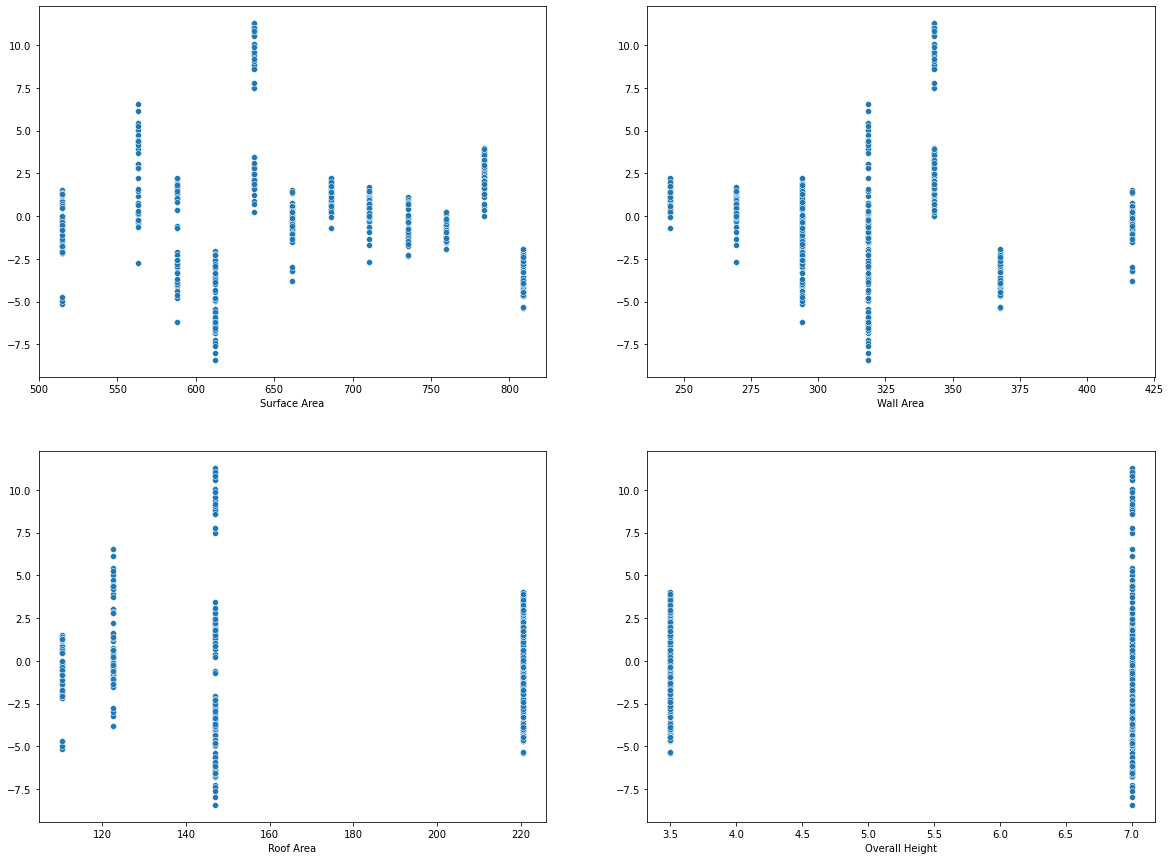

In [64]:
fig, ax = plt.subplots(nrows = 2, ncols= 2, figsize=(20, 15))
for variable, subplot in zip(X_train.columns[1:5], ax.flatten()):
    sns.scatterplot(X_train[variable], OLS_model.resid , ax=subplot)

plt.show()

In [66]:
#Interpretation: The above plots show no specific pattern, implies that there is a linearity present in the data.

In [65]:
# Autocorrelation

In [67]:
print(OLS_model.summary())

                                 OLS Regression Results                                
Dep. Variable:           Cooling Load   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                              4836.
Date:                Wed, 11 May 2022   Prob (F-statistic):                        0.00
Time:                        22:19:17   Log-Likelihood:                         -1403.0
No. Observations:                 537   AIC:                                      2820.
Df Residuals:                     530   BIC:                                      2850.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

In [68]:
#Interpretation: From the above summary, we can observe that the value obtained from the Durbin-Watson test statistic is close to 2 (= 1.981).
#Thus, we conclude that there is no autocorrelation.

In [69]:
# Heteroskedasticity -

In [74]:
name = ['f-value','p-value']
test = sms.het_breuschpagan(OLS_model.resid, OLS_model.model.exog)
lzip(name, test[2:])

[('f-value', 50.43365160005693), ('p-value', 6.3577334568972424e-55)]

In [75]:
# Test of normality

C:\anaconda\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


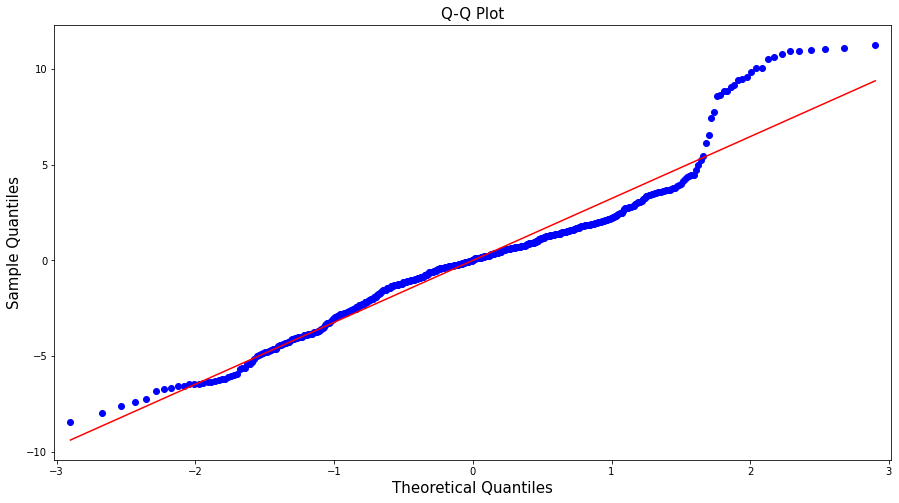

In [78]:
plt.rcParams['figure.figsize'] = [15,8]
qqplot(OLS_model.resid, line = 'r')
plt.title('Q-Q Plot', fontsize = 15)
plt.xlabel('Theoretical Quantiles', fontsize = 15)
plt.ylabel('Sample Quantiles', fontsize = 15)
plt.show()

In [80]:
# Interpretation: The diagonal line (red line) is the regression line and the blue points are the cumulative distribution of the residuals. As some of the points are away from the diagonal line, 
#we conclude that the residuals do not follow a normal distribution.

# Random Forest Regressor

In [84]:
rf_Regressor = RandomForestRegressor(n_estimators = 10, random_state = 10)
rf_model = rf_Regressor.fit(X_train, y_train)

In [86]:
train_pred = rf_model.predict(X_train)
mse_train = mean_squared_error(y_train, train_pred) 
rmse_train = round(np.sqrt(mse_train), 4)
print(rmse_train)

0.7304


In [88]:
test_pred = rf_model.predict(X_test)
mse_test = mean_squared_error(y_test, test_pred)
rmse_test = round(np.sqrt(mse_test), 4)
print(rmse_test)

1.6696


In [ ]:
#The rmse observed is high and the difference between the train and test rmse is also high indicating variation in the data.

# Recursive Feature Elimination (RFE)

In [92]:
linreg_rfe = LinearRegression()

rfe_model = RFE(estimator=linreg_rfe)

# fit the RFE model on the training dataset using fit()
rfe_model = rfe_model.fit(X_train, y_train)

feat_index = pd.Series(data = rfe_model.ranking_, index = X_train.columns)

signi_feat_rfe = feat_index[feat_index==1].index

print(signi_feat_rfe)

Index(['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area'], dtype='object')


In [93]:
X1=df[['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area']]

In [95]:
df_tar=df['Cooling Load']

In [96]:
y = (df_tar - df_tar.mean()) / df_tar.std()

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, random_state = 10, test_size = 0.3)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (537, 4)
y_train (537,)
X_test (231, 4)
y_test (231,)


# Multiple Linear Regression (OLS)

In [98]:
linreg = LinearRegression()
MLR_model = linreg.fit(X_train, y_train)
MLR_model.score(X_train, y_train)

0.8162927443255172

# GradientBoosting with RFE

In [100]:
gboost_model = GradientBoostingRegressor(n_estimators = 150, max_depth = 10, random_state = 10)
gboost_model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=10, n_estimators=150, random_state=10)

In [101]:
train_pred = gboost_model.predict(X_train)
mse_train = mean_squared_error(y_train, train_pred) 
rmse_train = round(np.sqrt(mse_train), 4)
print(rmse_train)

0.2826


In [102]:
test_pred = gboost_model.predict(X_test)
mse_test = mean_squared_error(y_test, test_pred)
rmse_test = round(np.sqrt(mse_test), 4)
print(rmse_test)

0.2739


In [ ]:
#Inference-Gradient boosting method with rfe substantially reduces the rmse of train and test and the difference between them is also minor indicating this method as one of the optimum method to predict cooling load.

# Heating Load(Train_test_split)

In [105]:
X=df.iloc[:,:8]
y=df.iloc[:,8:9]


In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.3)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (537, 8)
y_train (537, 1)
X_test (231, 8)
y_test (231, 1)


In [124]:
linreg = LinearRegression()
MLR_model = linreg.fit(X_train, y_train)
MLR_model.score(X_train, y_train)

0.9127917280280566

In [125]:
OLS_model = sm.OLS(y_train , X_train).fit()
OLS_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           Heating Load   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              5044.
Date:                Fri, 13 May 2022   Prob (F-statistic):                        0.00
Time:                        07:08:34   Log-Likelihood:                         -1352.2
No. Observations:                 537   AIC:                                      2718.
Df Residuals:                     530   BIC:                                      2748.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Relative Compactness        -18.6519      2.210     -8.438      0.000     -22.994     -14.310
Surface Area                 -0.0045      0.002     -2.898      0.004      -0.008      -0.001
Wall Area                     0.0355      0.005      7.814      0.000       0.027       0.044
Roof Area                    -0.0200      0.003     -6.804      0.000      -0.026      -0.014
Overall Height                5.0587      0.272     18.580      0.000       4.524       5.594
Orientation                  -0.0317      0.118     -0.270      0.788      -0.263       0.199
Glazing Area                 20.4321      1.011     20.208      0.000      18.446      22.418
Glazing Area Distribution     0.1950      0.088      2.220      0.027       0.022       0.368
==============================================================================
Omnibus:                        8.170   Durbin-Watson:                   2.205
Prob(Omnibus):                  0.017   Jarque-Bera (JB):               12.382
Skew:                           0.057   Prob(JB):                      0.00205
Kurtosis:                       3.735   Cond. No.                     1.22e+16
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 2.14e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [109]:
# Assumptions of ML

In [110]:
# Linearity

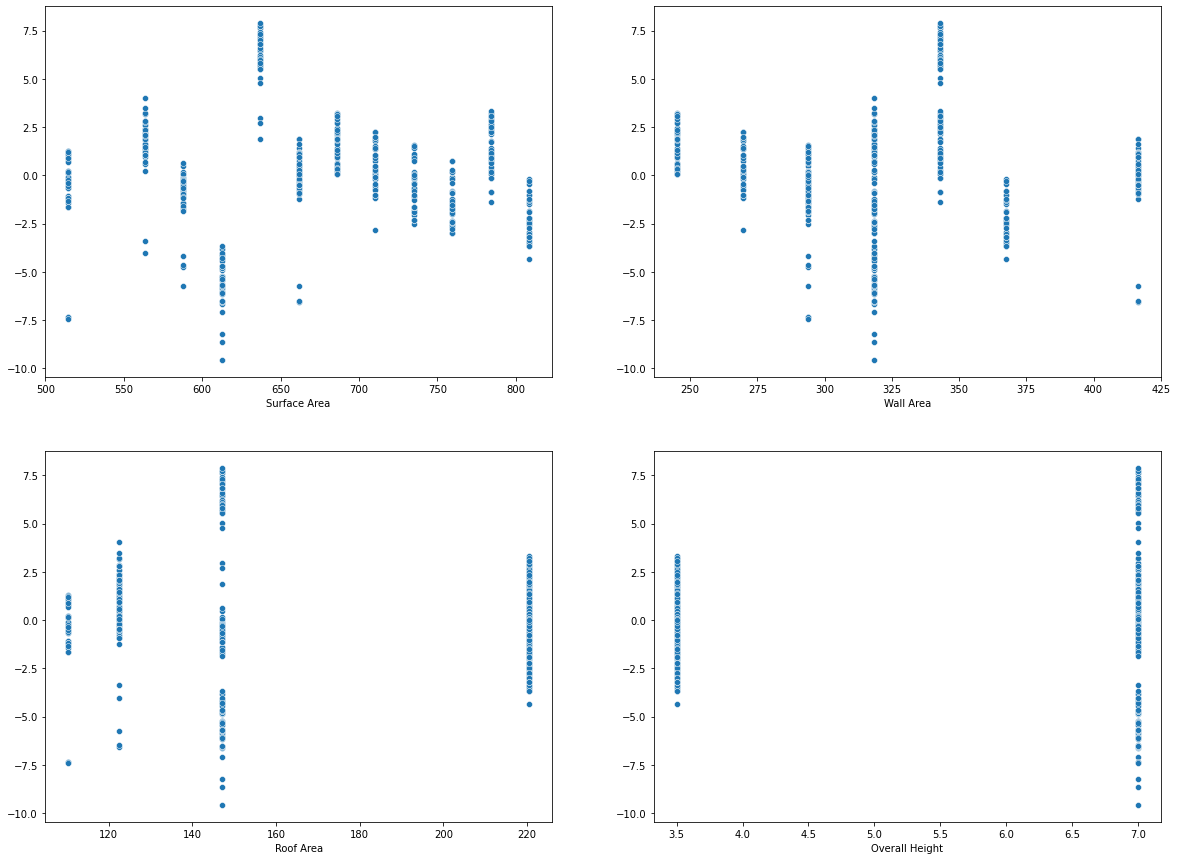

In [111]:
fig, ax = plt.subplots(nrows = 2, ncols= 2, figsize=(20, 15))
for variable, subplot in zip(X_train.columns[1:5], ax.flatten()):
    sns.scatterplot(X_train[variable], OLS_model.resid , ax=subplot)

plt.show()

In [112]:
#Interpretation: The above plots show no specific pattern, implies that there is a linearity present in the data.

In [113]:
# Autocorrelation

In [114]:
print(OLS_model.summary())

                                 OLS Regression Results                                
Dep. Variable:           Heating Load   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              5044.
Date:                Fri, 13 May 2022   Prob (F-statistic):                        0.00
Time:                        07:05:11   Log-Likelihood:                         -1352.2
No. Observations:                 537   AIC:                                      2718.
Df Residuals:                     530   BIC:                                      2748.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

In [115]:
#Interpretation: From the above summary, we can observe that the value obtained from the Durbin-Watson test statistic is close to 2 (= 1.981).
#Thus, we conclude that there is no autocorrelation.

In [116]:
# Heteroskedasticity -

In [117]:
name = ['f-value','p-value']
test = sms.het_breuschpagan(OLS_model.resid, OLS_model.model.exog)
lzip(name, test[2:])

[('f-value', 91.23801417411681), ('p-value', 7.694263616003873e-87)]

In [118]:
# Test of normality

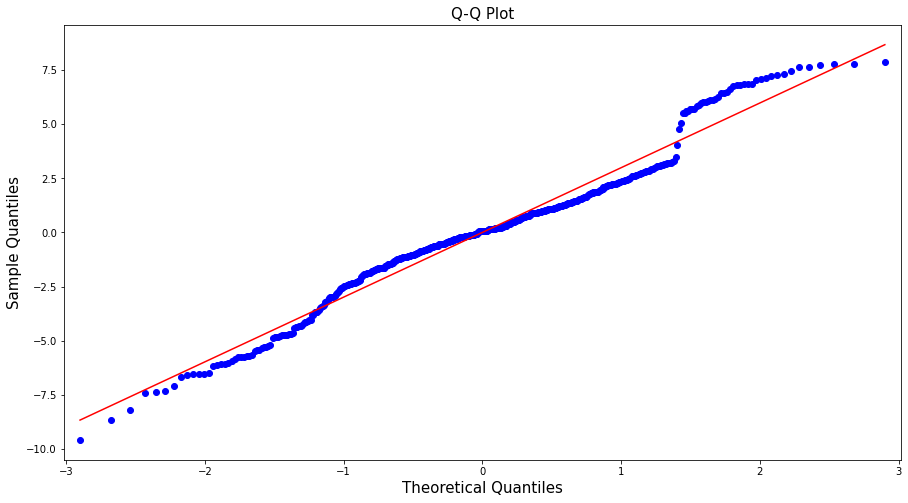

In [119]:
plt.rcParams['figure.figsize'] = [15,8]
qqplot(OLS_model.resid, line = 'r')
plt.title('Q-Q Plot', fontsize = 15)
plt.xlabel('Theoretical Quantiles', fontsize = 15)
plt.ylabel('Sample Quantiles', fontsize = 15)
plt.show()

In [120]:
# Interpretation: The diagonal line (red line) is the regression line and the blue points are the cumulative distribution of the residuals. As some of the points are away from the diagonal line, 
#we conclude that the residuals do not follow a normal distribution.

# Random Forest Regressor

In [126]:
rf_Regressor = RandomForestRegressor(n_estimators = 10, random_state = 10)
rf_model = rf_Regressor.fit(X_train, y_train)

In [127]:
train_pred = rf_model.predict(X_train)
mse_train = mean_squared_error(y_train, train_pred) 
rmse_train = round(np.sqrt(mse_train), 4)
print(rmse_train)

0.2253


In [128]:
test_pred = rf_model.predict(X_test)
mse_test = mean_squared_error(y_test, test_pred)
rmse_test = round(np.sqrt(mse_test), 4)
print(rmse_test)

0.5392


In [129]:
#The difference between the train and test rmse is  high indicating variation in the data.

# Recursive Feature Elimination(RFE)

In [130]:
linreg_rfe = LinearRegression()

rfe_model = RFE(estimator=linreg_rfe)

# fit the RFE model on the training dataset using fit()
rfe_model = rfe_model.fit(X_train, y_train)

feat_index = pd.Series(data = rfe_model.ranking_, index = X_train.columns)

signi_feat_rfe = feat_index[feat_index==1].index

print(signi_feat_rfe)

Index(['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area'], dtype='object')


In [131]:
X1=df[['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area']]

In [132]:
df_tar=df['Heating Load']

In [133]:
y = (df_tar - df_tar.mean()) / df_tar.std()

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, random_state = 10, test_size = 0.3)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (537, 4)
y_train (537,)
X_test (231, 4)
y_test (231,)


# Multiple Linear Regression(OLS)

In [135]:
linreg = LinearRegression()
MLR_model = linreg.fit(X_train, y_train)
MLR_model.score(X_train, y_train)

0.8202067446878851

# Gradient Boosting with RFE

In [136]:
gboost_model = GradientBoostingRegressor(n_estimators = 150, max_depth = 10, random_state = 10)
gboost_model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=10, n_estimators=150, random_state=10)

In [137]:
train_pred = gboost_model.predict(X_train)
mse_train = mean_squared_error(y_train, train_pred) 
rmse_train = round(np.sqrt(mse_train), 4)
print(rmse_train)

0.3058


In [138]:
test_pred = gboost_model.predict(X_test)
mse_test = mean_squared_error(y_test, test_pred)
rmse_test = round(np.sqrt(mse_test), 4)
print(rmse_test)

0.2964


In [139]:
#Inference-Gradient boosting method with rfe has low rmse of train and test and the difference between them is also minor indicating this method as one of the optimum method to predict heating load.